In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import ast
import time
from sklearn.metrics import mean_squared_error

In [2]:
def draw_image(X, y):
    # input: image and landmark coordinates
    # output: plot the labelled image
    X = X.reshape((256, 256, 3))
    y = y.reshape((194, 2))
    for i in range(y.shape[0]):
        for l in [-1, 0, 1]:
            for r in [-1, 0, 1]:
                X[y[i, 1] + l, y[i, 0] + r, 0] = 0
                X[y[i, 1] + l, y[i, 0] + r, 1] = 0
                X[y[i, 1] + l, y[i, 0] + r, 2] = 255
                
    plt.imshow(X[:,:,::-1])
    plt.axis('off')
    plt.show()

# get Y of an image
def load_y(file_prefix):
    # input: string; a prefix
    # output: np array of size 194 * 2; corresponding landmark coordinates
    path = 'D:\\Research\\Structure_1\\data\\'
    filename = path + file_prefix + '_coordinate'
    
    with open(filename, 'r') as f:
        facebox = f.readlines()
    facebox = ast.literal_eval(facebox[0])
    
    with open(path + file_prefix + '.txt', 'r') as f:
        index = f.readlines()
    
    coordinate = []

    for item in index[1:]:
        coordinate.append( list(map(float, item.strip('\n').split(','))))
        
    coordinate = np.round(np.array(coordinate)).astype(int)

    coordinate[:,0] -= facebox[0]
    coordinate[:,1] -= facebox[1]

    width = facebox[2] - facebox[0]
    height = facebox[3] - facebox[1]

    coordinate[:, 0] = coordinate[:, 0] / width * 256
    coordinate[:, 1] = coordinate[:, 1] / height * 256
    
    return coordinate.reshape((1, 194 * 2))

# get X of an image
def load_X(file_prefix):
    # input: string; a prefix
    # output: np array of size 194 * 194 * 3 by 1;
    path = 'D:\\Research\\Structure_1\\data\\'
    return cv2.imread(path + file_prefix + "_face.jpg").reshape((1, 256 * 256 * 3))

In [3]:
# load file prefix 
with open('filename.txt', 'r') as f:
    filename = f.readlines()

file_prefix_set = []
for item in filename:
    file_prefix_set.append(item.strip('\n'))

In [4]:
# Network Parameters
num_input = 256 # image size
num_channel = 3 # number of channel
num_output = 194 * 2 # coordinate size

training_size = 1800
validation_size = 200
test_size = 223

total_index = np.loadtxt('total_index.txt').astype('int')
train_index = total_index[: training_size]
validation_index = total_index[training_size : training_size + validation_size]
test_index = total_index[training_size + validation_size :]

In [30]:
for epoch in range(199, 200, 1):
    tf.reset_default_graph()
    config = tf.ConfigProto(allow_soft_placement=True)
    
    with tf.Session(config = config) as sess:

        filename = 'D:\Research\Structure_1\model\CNN_Epoch_' + str(epoch + 1) + '.ckpt'
        saver = tf.train.import_meta_graph(filename + '.meta')
        saver.restore(sess, filename)
        
        graph = tf.get_default_graph()

        X = graph.get_tensor_by_name('X:0')
        coordinate = graph.get_tensor_by_name('coordinate:0')
        keep_prob_1 = graph.get_tensor_by_name('keep_prob_1:0')
        keep_prob_2 = graph.get_tensor_by_name('keep_prob_2:0')
        keep_prob_3 = graph.get_tensor_by_name('keep_prob_3:0')
        keep_prob_4 = graph.get_tensor_by_name('keep_prob_4:0')
        
#         testRecord = []
#         start_time = time.time()
#         test_loss = 0
#         for i in range(len(test_index)):
#             test_X = load_X(file_prefix_set[test_index[i]])
#             test_y = load_y(file_prefix_set[test_index[i]])
#             coordinates = sess.run(coordinate, feed_dict = {X: test_X, keep_prob_1 : 1, keep_prob_2 : 1, 
#                                                            keep_prob_3 : 1, keep_prob_4 : 1})
#             test_loss += mean_squared_error(test_y, coordinates)
#         testRecord.append(test_loss ** 0.5 / len(test_index))
#         end_time = time.time()
        
        test_X = load_X(file_prefix_set[test_index[11]])
        test_y = load_y(file_prefix_set[test_index[11]])
        
        coordinates = sess.run(coordinate, feed_dict = {X: test_X, keep_prob_1 : 1, keep_prob_2 : 1, 
                                             keep_prob_3 : 1, keep_prob_4 : 1, keep_prob_5 : 1})

        coordinates = coordinates.reshape(-1, int(num_output / 2))

INFO:tensorflow:Restoring parameters from D:\Research\Structure_2\model\CNN_Epoch_200.ckpt


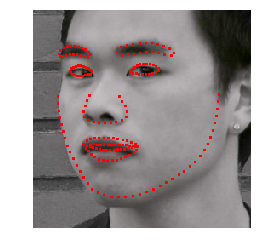

In [31]:
draw_image(test_X.copy(), coordinates.astype(int))

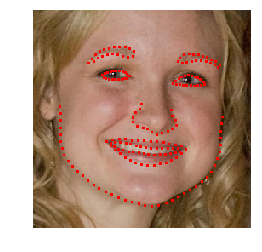

In [23]:
draw_image(test_X.copy(), test_y)

In [8]:
print(end_time - start_time)
print(testRecord)

7.5594916343688965
[0.6276912664551961]
